**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# import data 2C_weka.csv for 2 Class Classifcation.


In [2]:
two_c = pd.read_csv('2Classdata.csv')

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
two_c.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
two_c.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [5]:
two_c.shape

(310, 7)

In [6]:
two_c.size

2170

In [7]:
two_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


### **The given dataset has no missing values

In [8]:
two_c.describe(include = 'all')

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal
freq,NaN,NaN,NaN,NaN,NaN,NaN,210
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


In [9]:
two_c['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

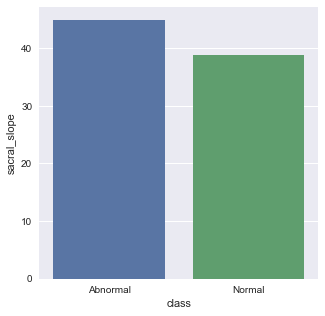

In [10]:
sns.set(rc={'figure.figsize':(5,5)})  
sns.barplot(x='class',y='sacral_slope',data=two_c,ci=.95)

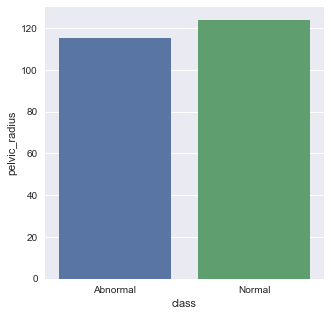

In [11]:
sns.set(rc={'figure.figsize':(5,5)})  
sns.barplot(x='class',y='pelvic_radius',data=two_c,ci=.75)

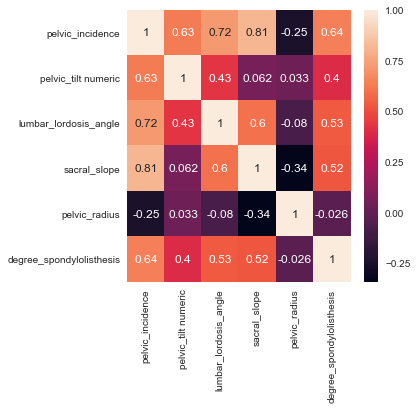

In [12]:
sns.heatmap(two_c.corr(), annot=True)

C:\Users\arany\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\arany\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


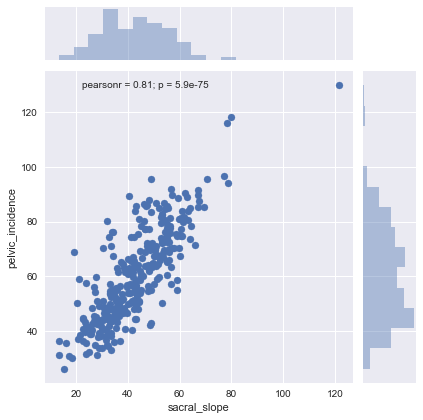

In [13]:
sns.jointplot(two_c['sacral_slope'], two_c['pelvic_incidence'])

### ** "sacral_slope" and "pelvic_incidence" have a very high correlation with eachother. It would be meaningful if we consider either of the two in our feature set. However since it is not being asked to drop features based on correlation, we are going ahead with the full data set for model building

# Encode the Class variable to integer.

In [14]:
two_c_encoded = two_c.apply(LabelEncoder().fit_transform)

In [15]:
two_c_encoded['class'].value_counts()

0    210
1    100
Name: class, dtype: int64

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [16]:
X = two_c_encoded.drop(columns="class")

In [17]:
y = two_c_encoded['class']

# Normalize your Data (X) to get values between 0 to 1.

In [18]:
mm_scaler = preprocessing.MinMaxScaler()

In [19]:
X_minmax = mm_scaler.fit_transform(X)

In [20]:
X_minmax_df = pd.DataFrame(X_minmax)

In [22]:
X_minmax_df.head()

,0,1,2,3,4,5
0,0.556634,0.763754,0.283154,0.450000,0.084142,0.177994
1,0.090615,0.223301,0.035842,0.150000,0.349515,0.349515
2,0.676375,0.754045,0.491039,0.614286,0.165049,0.058252
3,0.682848,0.809061,0.390681,0.596429,0.113269,0.495146
4,0.317152,0.197411,0.075269,0.442857,0.197411,0.456311


# Split the dat as train and test with a ratio of 70:30.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_minmax_df, y, test_size=0.3, random_state=100)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [159]:
NNH = KNeighborsClassifier(n_neighbors=5, weights = 'uniform', metric='euclidean')

In [160]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [161]:
predicted_labels = pd.DataFrame(NNH.predict(X_test))

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [162]:
y_train_pred = NNH.predict(X_train)
y_test_pred = NNH.predict(X_test)

In [163]:
accuracy_score_train = accuracy_score(y_train, y_train_pred)
accuracy_score_test = accuracy_score(y_test, y_test_pred)

In [164]:
print("train accuracy is ", accuracy_score_train)
print("test accuracy is ", accuracy_score_test)

train accuracy is  0.9078341013824884
test accuracy is  0.7849462365591398


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

### For the above 2 class dataset, when K = 5, we are getting the optimal value for test accuracy. Hence the best value for K is 5

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

###  Importing necessary libraries

In [166]:
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Importing the 3-class data

In [167]:
three_c = pd.read_csv('3Classdata.csv')

In [168]:
three_c.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [169]:
three_c.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [170]:
three_c.shape

(310, 7)

In [171]:
three_c.size

2170

In [173]:
three_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [174]:
three_c.describe(include = 'all')

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,Spondylolisthesis
freq,NaN,NaN,NaN,NaN,NaN,NaN,150
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


In [175]:
three_c['class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

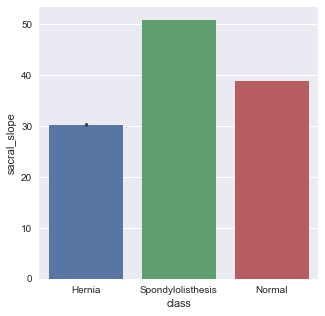

In [177]:
sns.set(rc={'figure.figsize':(5,5)})  
sns.barplot(x='class',y='sacral_slope',data=three_c,ci=.95)

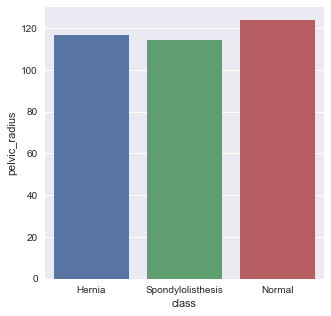

In [178]:
sns.set(rc={'figure.figsize':(5,5)})  
sns.barplot(x='class',y='pelvic_radius',data=three_c,ci=.95)

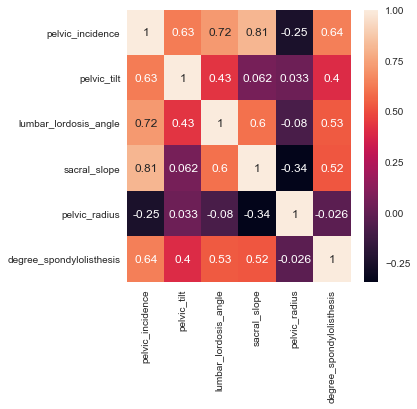

In [179]:
sns.heatmap(three_c.corr(), annot=True)

C:\Users\arany\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\arany\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


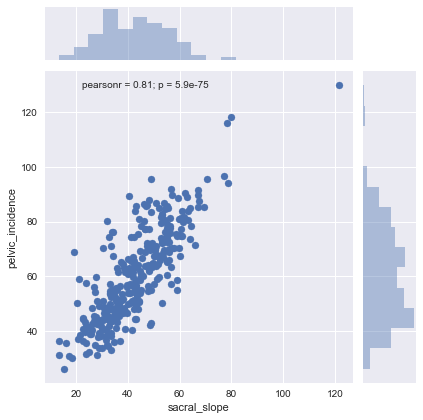

In [180]:
sns.jointplot(two_c['sacral_slope'], two_c['pelvic_incidence'])

### ** "sacral_slope" and "pelvic_incidence" have a very high correlation with eachother. It would be meaningful if we consider either of the two in our feature set. However since it is not being asked to drop features based on correlation, we are going ahead with the full data set for model building

# Encode the Class variable to integer.

In [181]:
three_c_encoded = three_c.apply(LabelEncoder().fit_transform)

In [182]:
three_c_encoded['class'].value_counts()

2    150
1    100
0     60
Name: class, dtype: int64

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [185]:
X = three_c_encoded.drop(columns="class")

In [186]:
y = three_c_encoded['class']

# Normalize your Data (X) to get values between 0 to 1.

In [187]:
mm_scaler = preprocessing.MinMaxScaler()
X_minmax = mm_scaler.fit_transform(X)
X_minmax_df = pd.DataFrame(X_minmax)


In [188]:
X_minmax_df.head()

,0,1,2,3,4,5
0,0.556634,0.763754,0.283154,0.450000,0.084142,0.177994
1,0.090615,0.223301,0.035842,0.150000,0.349515,0.349515
2,0.676375,0.754045,0.491039,0.614286,0.165049,0.058252
3,0.682848,0.809061,0.390681,0.596429,0.113269,0.495146
4,0.317152,0.197411,0.075269,0.442857,0.197411,0.456311


# Split the dat as train and test with a ratio of 70:30.

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X_minmax_df, y, test_size=0.3, random_state=100)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [323]:
NNH = KNeighborsClassifier(n_neighbors=5, weights = 'uniform', metric='euclidean')

In [324]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [325]:
predicted_labels = pd.DataFrame(NNH.predict(X_test))

# Calculate the performance score of of your classification on test dataset.

In [326]:
y_train_pred = NNH.predict(X_train)
y_test_pred = NNH.predict(X_test)

In [327]:
accuracy_score_train = accuracy_score(y_train, y_train_pred)
accuracy_score_test = accuracy_score(y_test, y_test_pred)

In [328]:
print("train accuracy is ", accuracy_score_train)
print("test accuracy is ", accuracy_score_test)

train accuracy is  0.880184331797235
test accuracy is  0.7634408602150538


# What is the best K value for your classifcation?

### For the above 3 class dataset, when K = 5, we are getting the optimal value for test accuracy. Hence the best value for K is 5